### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [11]:
import pandas as pd  
import numpy as np

heart = pd.read_csv('Heart.csv')

### 2. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [2]:

print("First few rows of the dataset:")
print(heart.head())

print("\nSummary information of the dataset:")
print(heart.info())

print("\nSummary statistics of the dataset:")
print(heart.describe(include='all'))


categorical_vars = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal', 'AHD']
print("\nValue counts for categorical variables:")
for var in categorical_vars:
    print(f"\n{var}:\n{heart[var].value_counts()}")

print("\nCount of categories in categorical variables:")
for var in categorical_vars:
    print(heart[var].value_counts())


print("\nHighly imbalanced categorical variables:")
for var in categorical_vars:
    counts = heart[var].value_counts()
    imbalance_ratio = counts.max() / counts.sum()
    if imbalance_ratio > 0.8:
        print(var)

missing_vars = heart.columns[heart.isnull().any()].tolist()
print("\nVariables with missing data:")
print(missing_vars)

heart.dropna(inplace=True)



First few rows of the dataset:
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  

Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  --

The categorical variables are 'sex', 'chestpain', 'FBs', 'restecg', 'exang', 'slope', 'thal', and 'AHD'.

The numeric variables are 'age', 'restbp', 'chol', 'maxhr', 'oldpeak', and 'ca'.

Fbs is the only categorical varaible that is highly imbalances. 

There doesn't seem to be any missing data. 

The primary target is AHD which indicates 'yes' or 'no' for Atherosclerotic Heart Disease.

Some interesting secondary variables could be risk factors for heart disease which include, age, resting blood pressure (RestBP), serum cholesterol levels (Chol), maxmimum heart rate (MaxHR), chest pain (ChestPain), and thalassemia (Thal).

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

/Users/melisa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


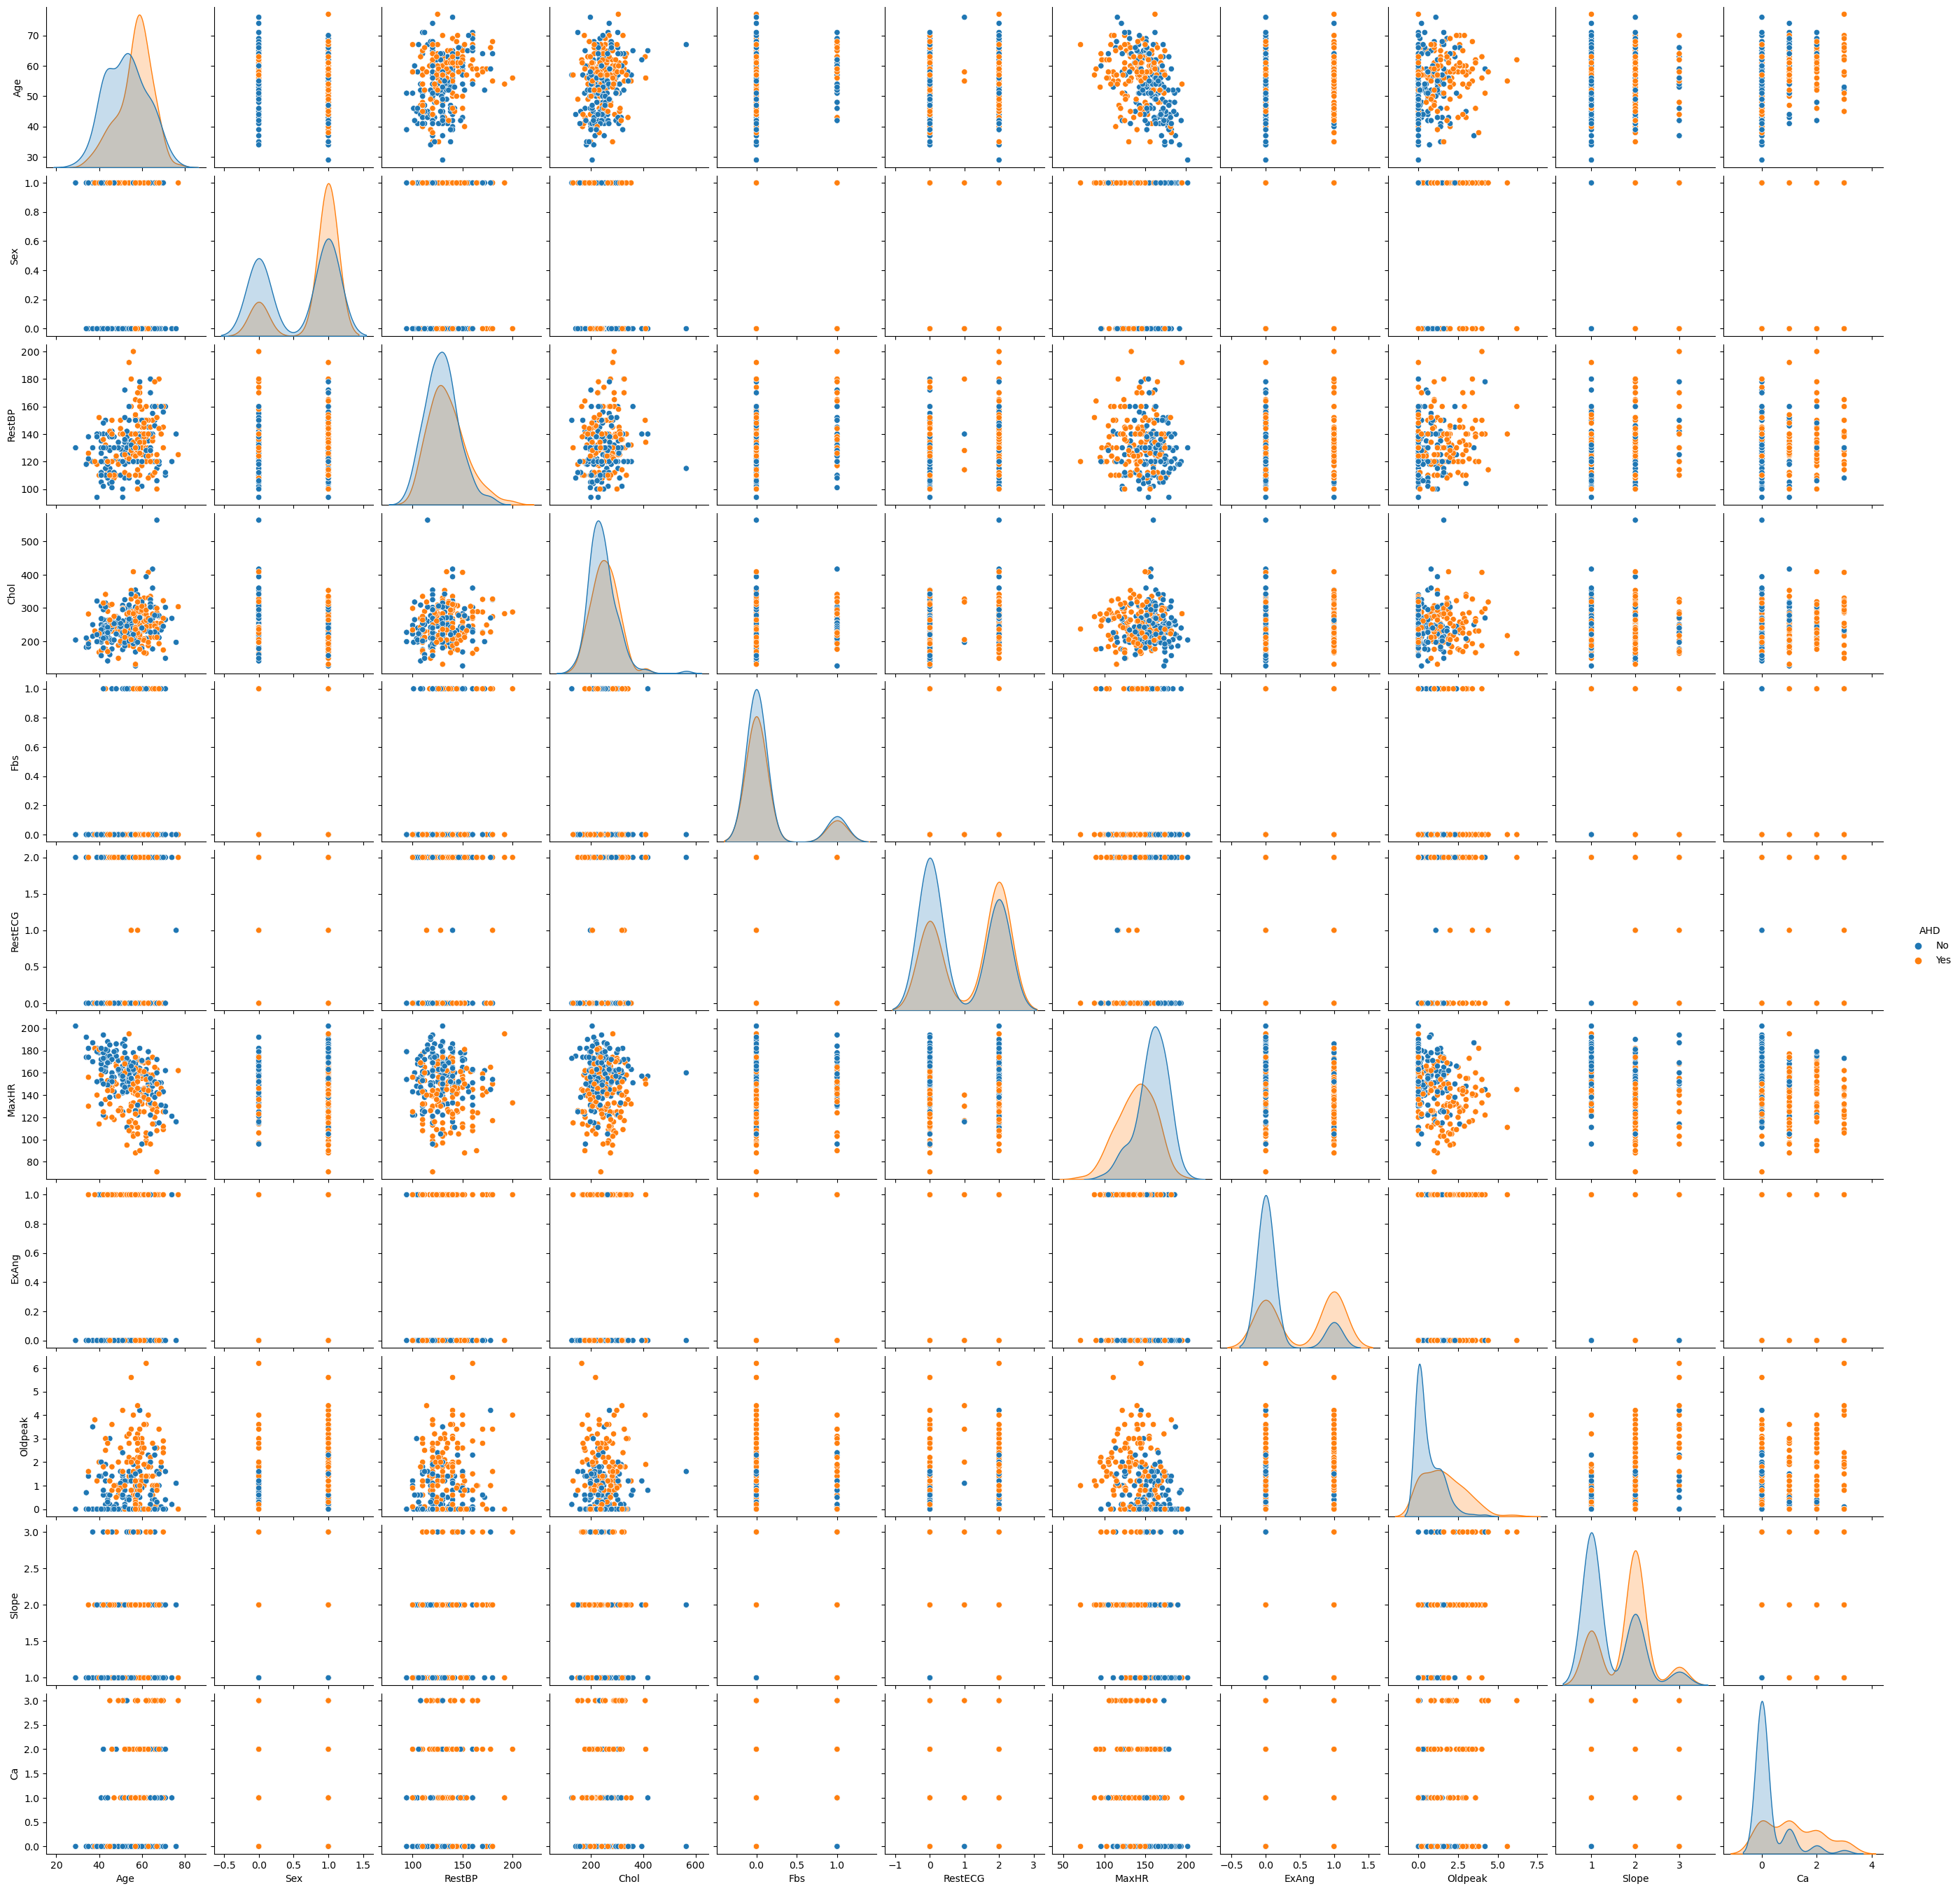

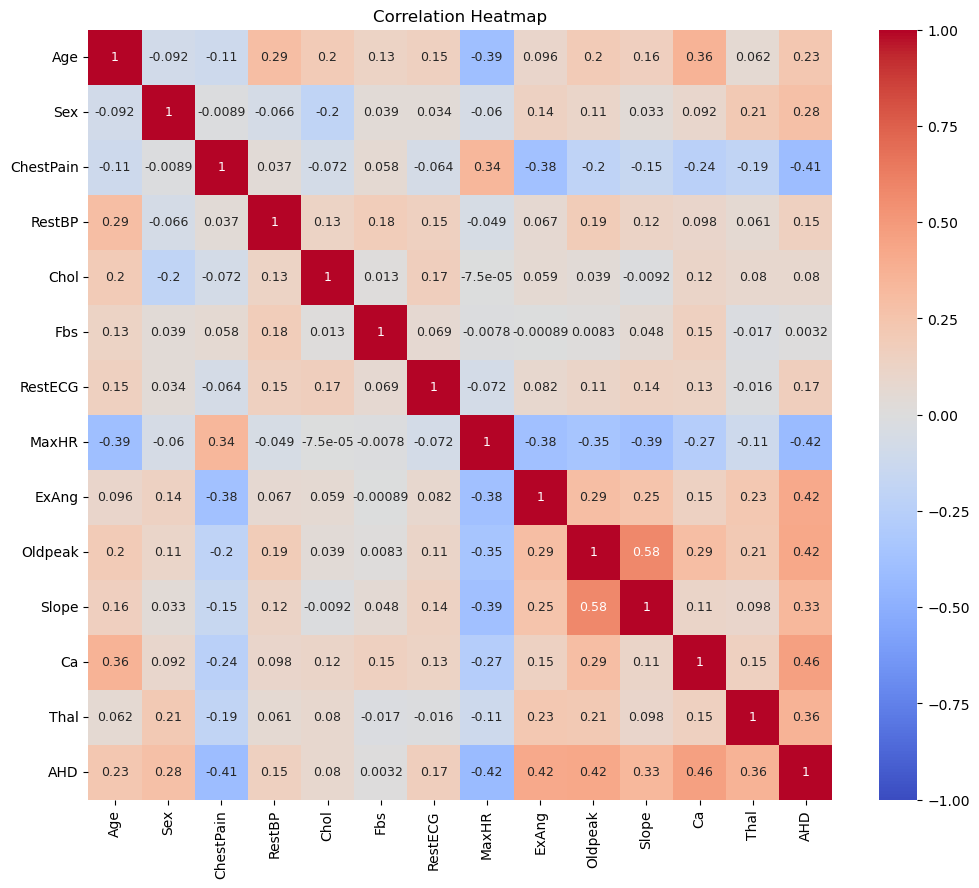

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


all_cols = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']


sns.pairplot(data=heart[all_cols], hue='AHD', diag_kind='kde')
plt.show()


categorical_cols = ['ChestPain', 'Thal', 'AHD', 'Sex', 'Fbs','RestECG','Slope', 'ExAng']
heart_encoded = heart.copy()
for col in categorical_cols:
    heart_encoded[col] = heart_encoded[col].astype('category').cat.codes


plt.figure(figsize=(12, 10))
correlation_matrix = heart_encoded[all_cols].corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 9},vmin=-1, vmax=1) 
plt.title('Correlation Heatmap')
plt.show()

Based om the plots, slope seems to be highly correled with oldpeak. Age is slighly correlated with Ca and MaxHR. MaxHr seems slighly correlated with Ca, slope, old peack, age, and Exang. 

Based on the plots, these variables seem likely to be helpful in building a model that can predict heart disease: sex, age, and slope. ExAng, Oldpeack, and CA seems to also be correlated but less than the previously stated ones. 

Hypothesis: AHD is can be predicted by sex, age, and slope. As Age increases so does AHD, as slope increases so does AHD. 

### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [4]:
heart_encoded = pd.get_dummies(heart, columns=categorical_vars)

# Display the resulting encoded dataset
print(heart_encoded.head())

   Unnamed: 0  Age  RestBP  Chol  MaxHR  Oldpeak   Ca  Sex_0  Sex_1  \
0           1   63     145   233    150      2.3  0.0  False   True   
1           2   67     160   286    108      1.5  3.0  False   True   
2           3   67     120   229    129      2.6  2.0  False   True   
3           4   37     130   250    187      3.5  0.0  False   True   
4           5   41     130   204    172      1.4  0.0   True  False   

   ChestPain_asymptomatic  ...  ExAng_0  ExAng_1  Slope_1  Slope_2  Slope_3  \
0                   False  ...     True    False    False    False     True   
1                    True  ...    False     True    False     True    False   
2                    True  ...    False     True    False     True    False   
3                   False  ...     True    False    False    False     True   
4                   False  ...     True    False     True    False    False   

   Thal_fixed  Thal_normal  Thal_reversable  AHD_No  AHD_Yes  
0        True        False         

### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [9]:
from sklearn.model_selection import train_test_split, KFold

X = heart_encoded.drop('AHD_Yes', axis=1) 
y = heart_encoded['AHD_Yes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

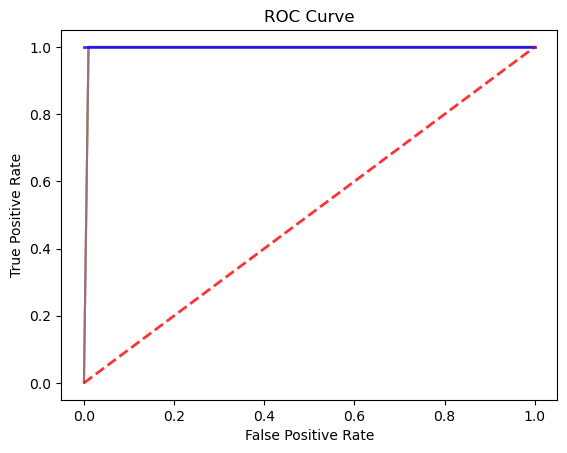

Mean Accuracy: 1.0
Mean AUC: 1.0
Confusion Matrix for Fold 1:
[[24  0]
 [ 0 24]]
Confusion Matrix for Fold 2:
[[25  0]
 [ 0 23]]
Confusion Matrix for Fold 3:
[[27  0]
 [ 0 20]]
Confusion Matrix for Fold 4:
[[27  0]
 [ 0 20]]
Confusion Matrix for Fold 5:
[[21  0]
 [ 0 26]]


In [23]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


logreg = LogisticRegression(max_iter=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
confusion_matrices = []
roc_auc_scores = []
mean_fpr = np.linspace(0, 1, 100)

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    

    scaler = StandardScaler()
 
    X_train_fold_scaled = scaler.fit_transform(X_train_fold)

    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    logreg.fit(X_train_fold_scaled, y_train_fold)
    y_pred_fold = logreg.predict(X_val_fold_scaled)
    y_pred_proba_fold = logreg.predict_proba(X_val_fold_scaled)[:, 1]
    
    accuracy = accuracy_score(y_val_fold, y_pred_fold)
    accuracies.append(accuracy)
    
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    confusion_matrices.append(cm)
    
    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_proba_fold)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    tpr = np.interp(mean_fpr, fpr, tpr)
    tpr[0] = 0.0
    plt.plot(mean_fpr, tpr, alpha=0.4)

mean_accuracy = np.mean(accuracies)
mean_auc = np.mean(roc_auc_scores)


mean_tpr = np.mean([
    np.interp(mean_fpr, roc_curve(y_train.iloc[val_index], logreg.predict_proba(scaler.transform(X_train.iloc[val_index]))[:, 1])[0],
              roc_curve(y_train.iloc[val_index], logreg.predict_proba(scaler.transform(X_train.iloc[val_index]))[:, 1])[1])
    for train_index, val_index in kf.split(X_train)], axis=0)

mean_tpr[-1] = 1.0


plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, alpha=0.8)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean AUC: {mean_auc}')
for i, cm in enumerate(confusion_matrices, 1):
    print(f'Confusion Matrix for Fold {i}:\n{cm}')



### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

Accuracy: 1.0
Confusion Matrix:
[[36  0]
 [ 0 24]]


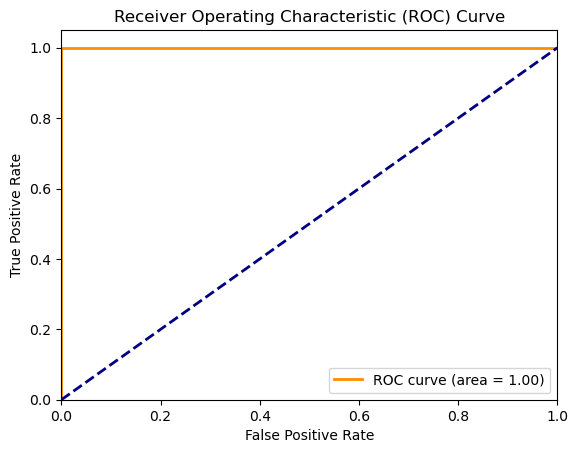

In [24]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   

In [27]:

coefficients = model.coef_[0] 

feature_names = X.columns  
features_with_coefficients = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)

print("Feature coefficients, from highest to lowest absolute value:")
for coef, name in features_with_coefficients:
    print(f"{name}: {coef:.4f}")

N = 10  
top_features = features_with_coefficients[:N]
print("\nTop features with the most weight:")
for coef, name in top_features:
    print(f"{name}: {coef:.4f}")


Feature coefficients, from highest to lowest absolute value:
AHD_No: -4.9349
ChestPain_nonanginal: -0.5626
ChestPain_asymptomatic: 0.5337
Ca: 0.5253
Sex_0: -0.4228
Fbs_1: -0.4198
Sex_1: 0.3932
Fbs_0: 0.3903
Thal_reversable: 0.3553
ChestPain_typical: -0.2722
ChestPain_nontypical: 0.2715
ExAng_0: -0.2606
RestECG_0: -0.2382
Oldpeak: 0.2380
ExAng_1: 0.2311
Slope_1: -0.2246
Slope_2: 0.2183
RestECG_2: 0.2088
Thal_fixed: -0.2056
Thal_normal: -0.1793
Slope_3: -0.0232
RestBP: 0.0145
MaxHR: -0.0093
Chol: 0.0033
Age: 0.0023
Unnamed: 0: -0.0006
RestECG_1: -0.0002

Top features with the most weight:
AHD_No: -4.9349
ChestPain_nonanginal: -0.5626
ChestPain_asymptomatic: 0.5337
Ca: 0.5253
Sex_0: -0.4228
Fbs_1: -0.4198
Sex_1: 0.3932
Fbs_0: 0.3903
Thal_reversable: 0.3553
ChestPain_typical: -0.2722


The coefficients with the most weight were AHD (no), Chespain (nonanginal & asymptomatic), and Ca. 